<a href="https://colab.research.google.com/github/BharathHKrishna/Bharath/blob/main/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

from keras.datasets import fashion_mnist
(images_train, labels_train), (images_test,labels_test) = fashion_mnist.load_data()

In [78]:
labels_test.shape

(10000,)

In [81]:
labels_train.shape

(60000,)

In [82]:
labels_train=np.array(labels_train).reshape(-1,1)
labels_test=np.array(labels_test).reshape(-1,1)
labels_train.shape

(60000, 1)

In [83]:
onehot=OneHotEncoder()

onehot.fit(labels_train)

labels_train=onehot.transform(labels_train)
labels_test=onehot.transform(labels_test)
labels_train=labels_train.toarray()
labels_test=labels_test.toarray()

In [84]:
labels_test.shape

(10000, 10)

In [85]:
np.unique(labels_test)

array([0., 1.])

In [86]:
images_train.shape

(60000, 28, 28)

In [87]:
images_test.shape

(10000, 28, 28)

In [88]:
images_train = np.array(images_train).reshape(60000,28,28,1)/255
images_test = np.array(images_test).reshape(10000,28,28,1)/255

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [90]:
# Sequential API
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=( 28, 28,1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
# Functional API
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

image=Input(shape=(28,28,1))

conv1=Conv2D(32, (5, 5), activation='relu',padding='same')(image)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

conv2=Conv2D(64, (5, 5),activation='relu',padding='same')(pool1)
pool2=MaxPooling2D(pool_size=(2, 2))(conv2)

flat_layer=Flatten()(pool2)

dense1=Dense(1024, activation='relu')(flat_layer)
drop1=Dropout(0.2)(dense1)

dense2=Dense(200, activation='relu')(drop1)
drop2=Dropout(0.2)(dense2)

output=Dense(10, activation='softmax')(drop2)

model=Model(inputs=image,outputs=output)
model.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 200)                 │         205,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,471,394 (13.24 MB)

 Trainable params: 3,471,394 (13.24 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(images_train,labels_train,validation_data=[images_test,labels_test], epochs=10,batch_size=5000,verbose=1)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.4233 - loss: 1.7389 - val_accuracy: 0.6995 - val_loss: 0.8428
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.7011 - loss: 0.8026 - val_accuracy: 0.7770 - val_loss: 0.5978
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.7740 - loss: 0.5986 - val_accuracy: 0.8058 - val_loss: 0.5063
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.8110 - loss: 0.5043 - val_accuracy: 0.8374 - val_loss: 0.4481
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.8386 - loss: 0.4437 - val_accuracy: 0.8532 - val_loss: 0.4093
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.8570 - loss: 0.3992 - val_accuracy: 0.8663 - val_loss: 0.3742
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.8712 - loss: 0.3626 - val_accuracy: 0.8695 - val_loss: 0.3546
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.8792 - loss: 0.3366 - val_accuracy: 0.

In [93]:
p=model.predict(images_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [96]:
import matplotlib.pyplot as plt

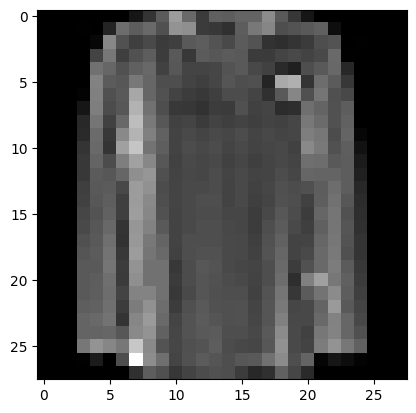

real label: 6
predicted label: 2


In [98]:
ind=1744
sample_image = images_test[ind,:,:,:]
# sample_image = np.array(sample_image, dtype='float')
pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print('real label:',np.argmax(labels_test[ind]))
print('predicted label:',labels_test_predicted[ind])